In [2]:
# import seaborn, pandas, and numpy

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load in metric_results_by_gender dataframe

eo_results_gender = pd.read_csv("Results/equalized_odds_metric_results_by_gender_coughvid_data_cv10.csv")
eo_results_gender.rename(columns = {"Female False Negative Rate Before" : "Female Before", 
                                    "Male False Negative Rate Before" : "Male Before", 
                                    "Female False Negative Rate After" : "Female After", 
                                    "Male False Negative Rate After" : "Male After",
                                    "Equalized Odds Ratio Gender Before" : "Ratio Before",
                                    "Equalized Odds Ratio Gender After" : "Ratio After", 
                                    "Equalized Odds Difference Gender Before" : "Difference Before",
                                    "Equalized Odds Difference Gender After" : "Difference After"}, 
                         inplace = True)

In [21]:
# define the gender metrics

gender_metrics = {
    "False Negative Rate": ["Female Before", "Male Before", "Female After", "Male After"],
    "Equalized Odds Ratio": ["Ratio Before", "Ratio After"],
    "Equalized Odds Difference": ["Difference Before", "Difference After"],
}

In [22]:
# set up the color palette
# purple for female, orange for male

palette = {}

for metric, columns in gender_metrics.items():
    for column in columns:
        if "Female" in column:
            palette[column] = plt.cm.Set3(2)
        elif "Male" in column:
            palette[column] = plt.cm.Set3(5)
        elif "Before" in column:
            palette[column] = plt.cm.Set3(2)
        else:
            palette[column] = plt.cm.Set3(5)

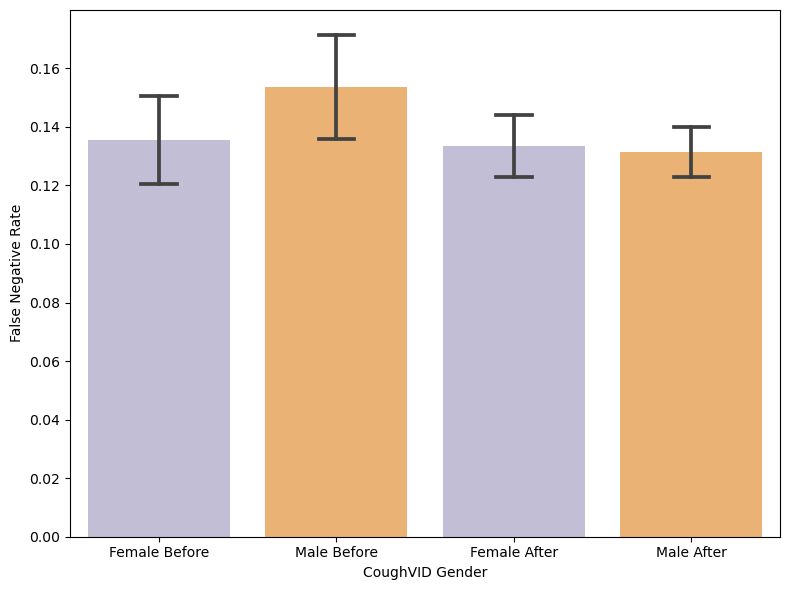

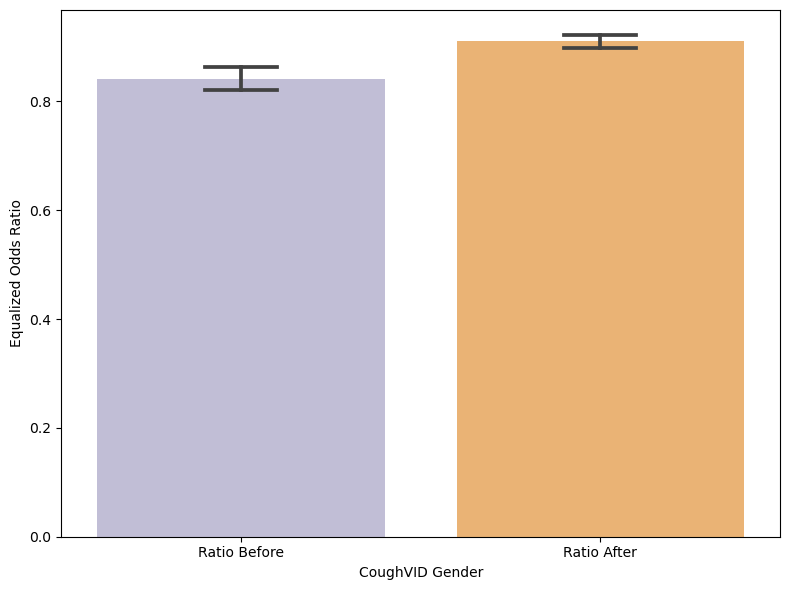

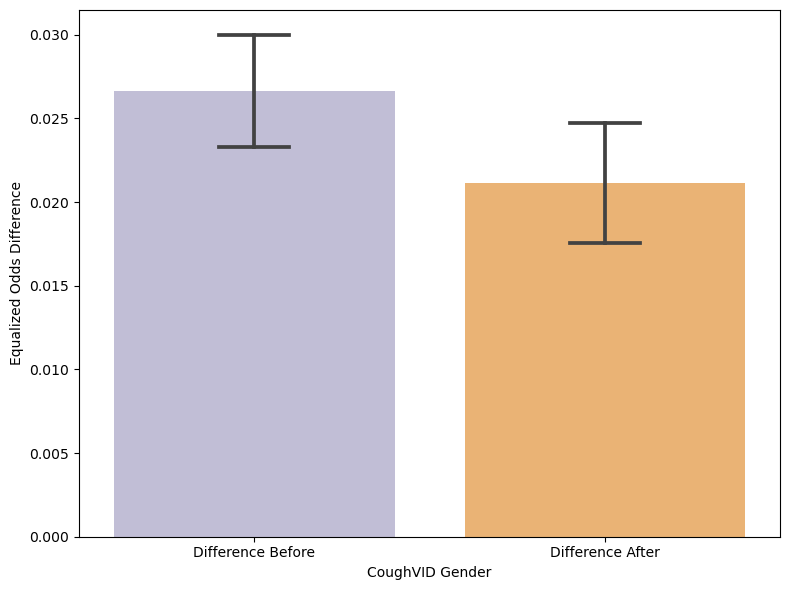

In [23]:
# make barplots with error bars showing standard error
# for EQUALIZED ODDS

for metric, columns in gender_metrics.items():
    plt.figure(figsize=(8, 6))
    
    eo_results_gender_metric = eo_results_gender[columns]
    eo_results_gender_metric_melted = eo_results_gender_metric.melt(var_name = "Gender", value_name = metric)
    
    sns.barplot(x = "Gender", y = metric, data = eo_results_gender_metric_melted, estimator = np.mean, 
                errorbar = "se", capsize = 0.2, palette = palette)
    
    plt.xlabel("CoughVID Gender")
    plt.ylabel(metric)

    plt.tight_layout()
    
    plt.show()

In [4]:
# load in metric_results_by_age dataframe

eo_results_age = pd.read_csv("Results/equalized_odds_metric_results_by_age_coughvid_data_cv10.csv")
eo_results_age.rename(columns = {"Young False Negative Rate Before" : "Young Before", 
                                    "Old False Negative Rate Before" : "Old Before", 
                                    "Young False Negative Rate After" : "Young After", 
                                    "Old False Negative Rate After" : "Old After",
                                    "Equalized Odds Ratio Age Before" : "Ratio Before",
                                    "Equalized Odds Ratio Age After" : "Ratio After", 
                                    "Equalized Odds Difference Age Before" : "Difference Before",
                                    "Equalized Odds Difference Age After" : "Difference After"}, 
                         inplace = True)

In [25]:
# define the age metrics

age_metrics = {
    "False Negative Rate": ["Young Before", "Old Before", "Young After", "Old After"],
    "Equalized Odds Ratio": ["Ratio Before", "Ratio After"],
    "Equalized Odds Difference": ["Difference Before", "Difference After"],
}

In [26]:
# set up the color palette
# pink for young, grey for old

palette = {}

for metric, columns in age_metrics.items():
    for column in columns:
        if "Young" in column:
            palette[column] = plt.cm.Set3(7)
        elif "Old" in column:
            palette[column] = plt.cm.Set3(8)
        elif "Before" in column:
            palette[column] = plt.cm.Set3(7)
        else:
            palette[column] = plt.cm.Set3(8)

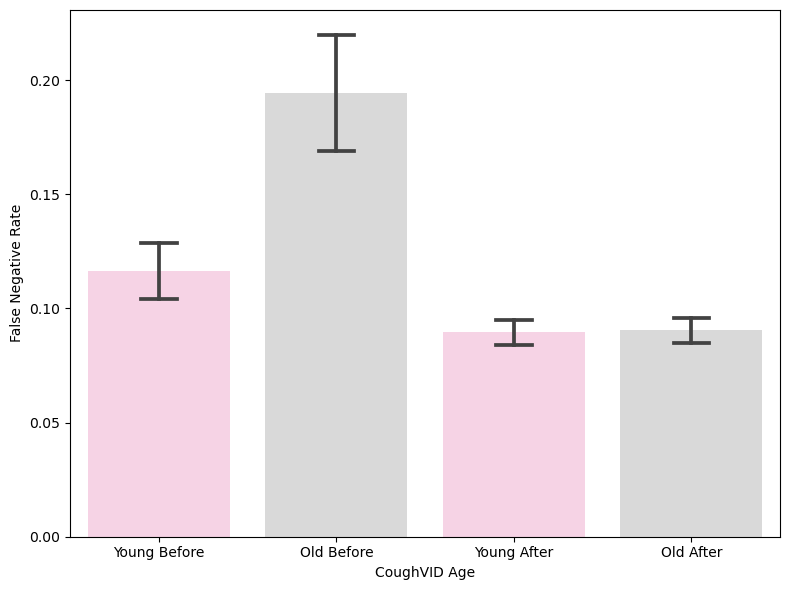

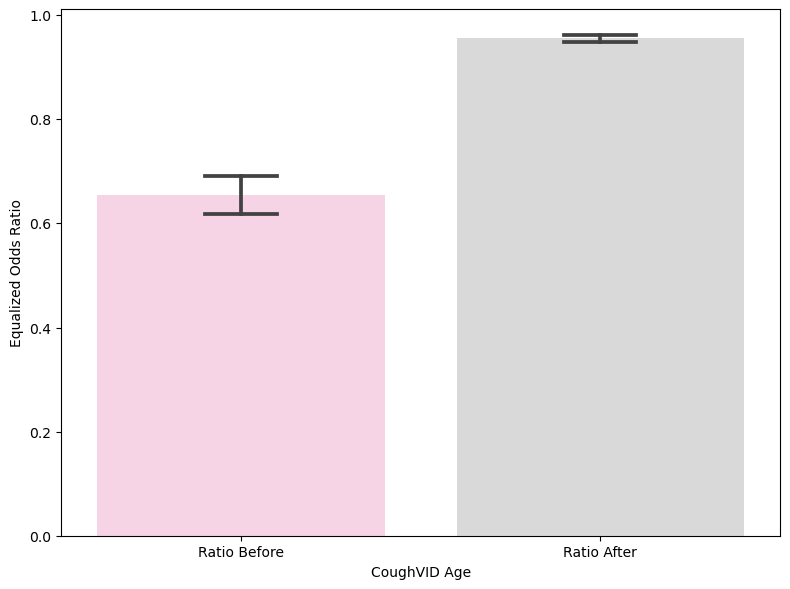

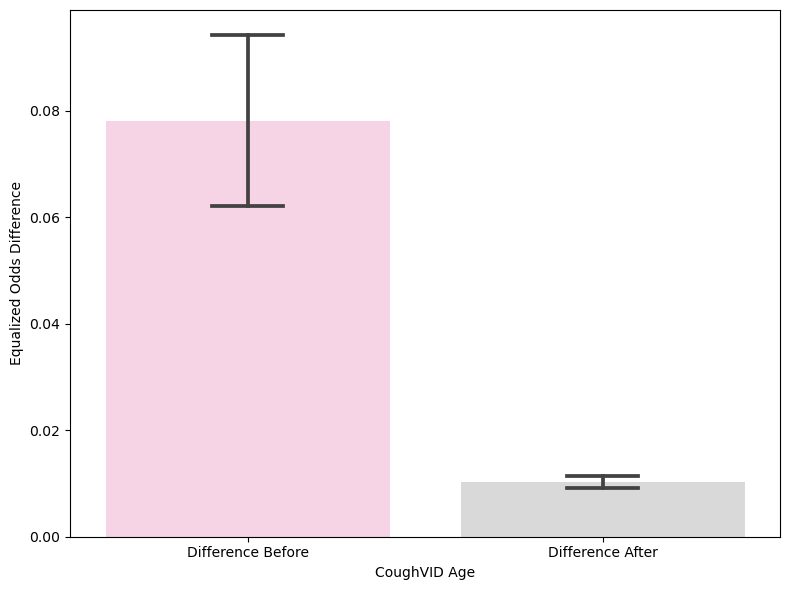

In [27]:
# make barplots with error bars showing standard error

for metric, columns in age_metrics.items():
    plt.figure(figsize=(8, 6))
    
    eo_results_age_metric = eo_results_age[columns]
    eo_results_age_metric_melted = eo_results_age_metric.melt(var_name = "Age", value_name = metric)
    
    sns.barplot(x = "Age", y = metric, data = eo_results_age_metric_melted, estimator = np.mean, 
                errorbar = "se", capsize = 0.2, palette=palette)
    
    plt.xlabel("CoughVID Age")
    plt.ylabel(metric)
    
    plt.tight_layout()
    
    plt.show()